# Surface Plots (k=3): Groups 1, 2, and 3 [DMN, VN, SN]

## Imports

In [ ]:
import os
import os.path as op
import numpy as np 
import nibabel as nib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch
from neuromaps import transforms
from neuromaps.datasets import fetch_fslr
from gradec.utils import _zero_medial_wall
from surfplot import Plot
%matplotlib inline

## Directories

In [ ]:
data_dir = "./data/k=3"
fig_dir = "./figures/network"

dn_img = op.join(data_dir, "k3_c1", "default_uniformity-test_z_FDR_0.01.nii")
g1_img = op.join(data_dir, "k3_c1", "k_cluster_maps_k3_group0_tstat_fdr_clust_p-01_vox-50.nii")

vn_img = op.join(data_dir, "k3_c2", "visual_uniformity-test_z_FDR_0.01.nii")
g2_img = op.join(data_dir, "k3_c2", "k_cluster_maps_k3_group1_tstat_fdr_clust_p-01_vox-50.nii")

sn_img = op.join(data_dir, "k3_c3", "salience network_uniformity-test_z_FDR_0.01.nii")
g3_img = op.join(data_dir, "k3_c3", "k_cluster_maps_k3_group2_tstat_fdr_clust_p-01_vox-50.nii")

## Colors: Networks and Cluster Groups

In [ ]:
networks = [
    {"name": "Default Mode Network", 
     "net_img": dn_img, 
     "clus_img": g1_img, 
     "net_color": "#F26907", 
     "clus_color": "#05A7D8", 
     "fig_name": "c1_DMN.png"},

    {"name": "Visual Network", 
     "net_img": vn_img, 
     "clus_img": g2_img, 
     "net_color": "#83FF4AA9", 
     "clus_color": "#F30B58", 
     "fig_name": "c2_VN.png"},

    {"name": "Salience Network", 
     "net_img": sn_img, 
     "clus_img": g3_img, 
     "net_color": "#8843FD", 
     "clus_color": "#DD0DDD", 
     "fig_name": "c3_SN.png"}
]

for net in networks:
    net["net_cmap"] = ListedColormap([net["net_color"]])
    net["clus_cmap"] = ListedColormap([net["clus_color"]])

## Compute surface data

In [ ]:
surfaces = fetch_fslr(density="32k")
lh, rh = surfaces["inflated"]
sulc_lh, sulc_rh = surfaces["sulc"]

for net in networks: 
    overlay_imgs = [net["net_img"], net["clus_img"]]
    overlay_cmaps = [net["net_cmap"], net["clus_cmap"]]
    overlay_surf_data = []
    for img in overlay_imgs:
        data = nib.load(img).get_fdata()
        data = np.nan_to_num(data)
        data[data <= 0] = 0
        img_pos = nib.Nifti1Image(data, nib.load(img).affine, nib.load(img).header)
        lh_data, rh_data = transforms.mni152_to_fslr(img_pos, fslr_density="32k")
        lh_data, rh_data = _zero_medial_wall(lh_data, rh_data, space="fsLR", density="32k")
        overlay_surf_data.append((lh_data, rh_data))
    net["overlay_surf_data"] = overlay_surf_data

## Plot each group/network to fsLR surface

Saved figure to: ./data/k=3/c1_DMN.png


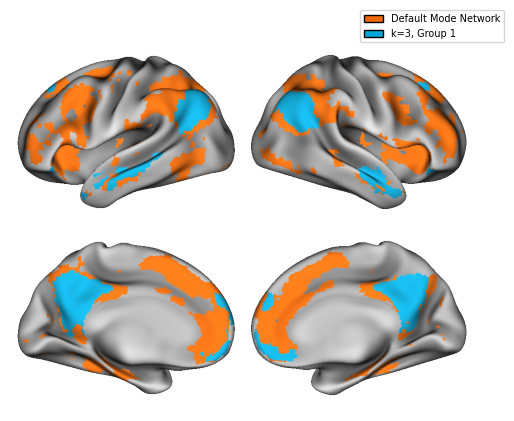

Saved figure to: ./data/k=3/c2_VN.png


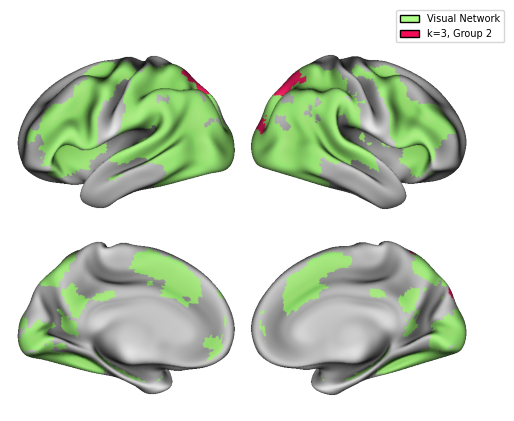

Saved figure to: ./data/k=3/c3_SN.png


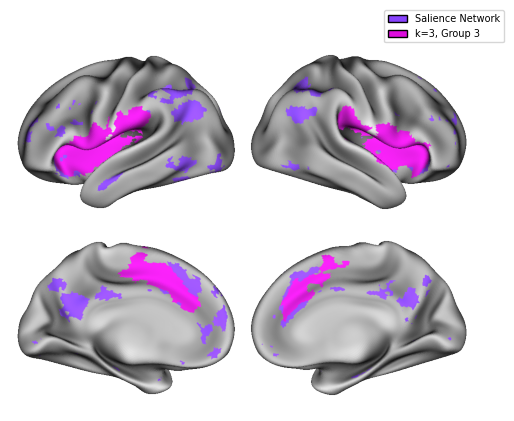

In [ ]:
surfaces = fetch_fslr(density="32k")
lh, rh = surfaces["inflated"]
sulc_lh, sulc_rh = surfaces["sulc"]

for net in networks: 
    p = Plot(lh, rh, layout="grid")
    p.add_layer({"left": sulc_lh, "right": sulc_rh}, cmap="binary_r", cbar=False, alpha=0.7)
    
    # for (lh_data, rh_data), cmap in zip(overlay_surf_data, overlay_cmaps):
    for (lh_data, rh_data), cmap in zip(net["overlay_surf_data"], [net["net_cmap"], net["clus_cmap"]]):
        lh_array = lh_data.agg_data()
        rh_array = rh_data.agg_data()    
        p.add_layer({"left": lh_array, "right": rh_array}, cmap=cmap, cbar=False)

    fig = p.build()
    legend_elements = [
        Patch(facecolor=net["net_color"], edgecolor="k", label=net["name"]),
        Patch(facecolor=net["clus_color"], edgecolor="k", label=f"k=3, Group {networks.index(net) + 1}")
    ]
    plt.legend(handles=legend_elements, loc="upper right", fontsize=7, frameon=True, borderaxespad=-3)
    fig_path = os.path.join(fig_dir, net["fig_name"])
    fig.savefig(fig_path, dpi=300)
    print(f"Saved figure to: {fig_path}")
    plt.show()
    plt.close(fig)


## Plot Side-by-Side Network Surfs (k=3)

Saved figure to: ./data/k=3/network_cluster_surf.png


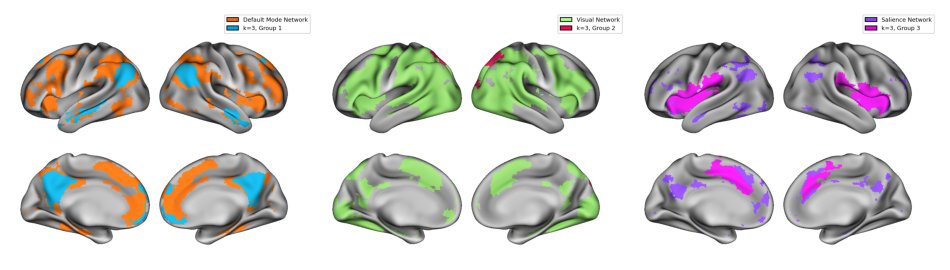

In [31]:
fig, axes = plt.subplots(1, 3, figsize=(12, 6))
for i, net in enumerate(networks):
    img = plt.imread(op.join(data_dir, net["fig_name"]))
    axes[i].imshow(img)
    axes[i].axis("off")
plt.subplots_adjust(bottom=0.02, wspace=0.02)

fig_path = op.join(data_dir, "network_cluster_surf.png")
fig.savefig(fig_path, dpi=300)
print(f"Saved figure to: {fig_path}")
plt.show()
plt.close(fig)